DELIVERABLE 01

In [ ]:
import os
import pandas as pd
import networkx as nx

# Step 1: Define paths to type_1, type_2, and type_3 folders
graph_dirs = ['/content/drive/MyDrive/graphs/type_1',
              '/content/drive/MyDrive/graphs/type_2',
              '/content/drive/MyDrive/graphs/type_3']
graphs_by_type = {'type_1': {}, 'type_2': {}, 'type_3': {}}

# Step 2: Load CSV files from the folders and store them by type
for graph_dir in graph_dirs:
    graph_type = os.path.basename(graph_dir)  # 'type_1', 'type_2', or 'type_3'
    graph_files = [f for f in os.listdir(graph_dir) if f.endswith('.csv')]

    for file in graph_files:
        file_path = os.path.join(graph_dir, file)
        matrix = pd.read_csv(file_path, header=None).values
        graphs_by_type[graph_type][file] = matrix

# Step 3: Function to create a graph and count nodes/edges
def load_graph(matrix):
    G = nx.Graph()
    rows, cols = matrix.shape
    for i in range(rows):
        for j in range(i + 1, cols):  # Only upper triangle for undirected graphs
            if matrix[i, j] != -1:  # Edge exists
                G.add_edge(i, j, weight=matrix[i, j])
    return G

# Step 4: Process each graph to compute nodes and edges for each type
graph_info_by_type = {'type_1': {}, 'type_2': {}, 'type_3': {}}

for graph_type, graphs in graphs_by_type.items():
    for name, matrix in graphs.items():
        G = load_graph(matrix)
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        graph_info_by_type[graph_type][name] = {'nodes': num_nodes, 'edges': num_edges}

# Step 5: Create summary tables for each graph type
tables_by_type = {}
for graph_type, graph_info in graph_info_by_type.items():
    # Sort the graph files in ascending order based on their numeric part in the filename
    sorted_graphs = sorted(graph_info.items(), key=lambda x: int(x[0].split('_')[2].split('.')[0]))  # Sort by numeric part in filename
    for graph_name, info in sorted_graphs:
        num_nodes = info['nodes']
        num_edges = info['edges']
        # Format the output as per the expected format
        print(f"{graph_type}\t{graph_name} , \t({num_nodes-1}, {num_nodes}) , \t{num_edges}")


type_1	t1_graph_0.csv , 	(9, 10) , 	17
type_1	t1_graph_1.csv , 	(19, 20) , 	106
type_1	t1_graph_2.csv , 	(29, 30) , 	299
type_1	t1_graph_3.csv , 	(39, 40) , 	584
type_1	t1_graph_4.csv , 	(49, 50) , 	971
type_1	t1_graph_5.csv , 	(59, 60) , 	1447
type_1	t1_graph_6.csv , 	(69, 70) , 	2029
type_1	t1_graph_7.csv , 	(79, 80) , 	2729
type_1	t1_graph_8.csv , 	(89, 90) , 	3511
type_1	t1_graph_9.csv , 	(99, 100) , 	4384
type_2	t2_graph_0.csv , 	(9, 10) , 	45
type_2	t2_graph_1.csv , 	(19, 20) , 	172
type_2	t2_graph_2.csv , 	(29, 30) , 	336
type_2	t2_graph_3.csv , 	(39, 40) , 	505
type_2	t2_graph_4.csv , 	(49, 50) , 	683
type_2	t2_graph_5.csv , 	(59, 60) , 	898
type_2	t2_graph_6.csv , 	(69, 70) , 	1067
type_2	t2_graph_7.csv , 	(79, 80) , 	1296
type_2	t2_graph_8.csv , 	(89, 90) , 	1504
type_2	t2_graph_9.csv , 	(99, 100) , 	1675
type_3	t3_graph_0.csv , 	(9, 10) , 	17
type_3	t3_graph_1.csv , 	(19, 20) , 	40
type_3	t3_graph_2.csv , 	(29, 30) , 	56
type_3	t3_graph_3.csv , 	(39, 40) , 	76
type_3	t3_grap

DELIVERABLE 02

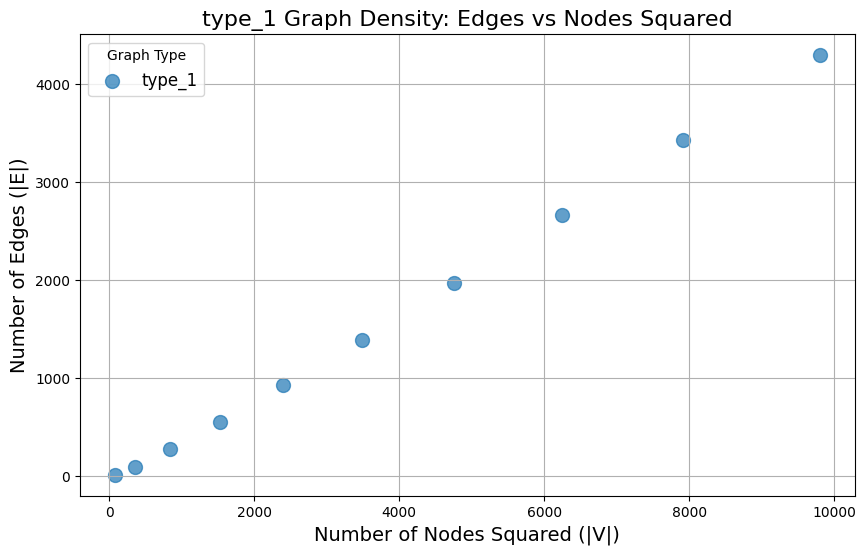

Density Summary for type_1:
     Type  avg_edges  avg_nodes  avg_edges_per_node Density Classification
0  Type 3      103.1       54.0            1.853249                  Dense


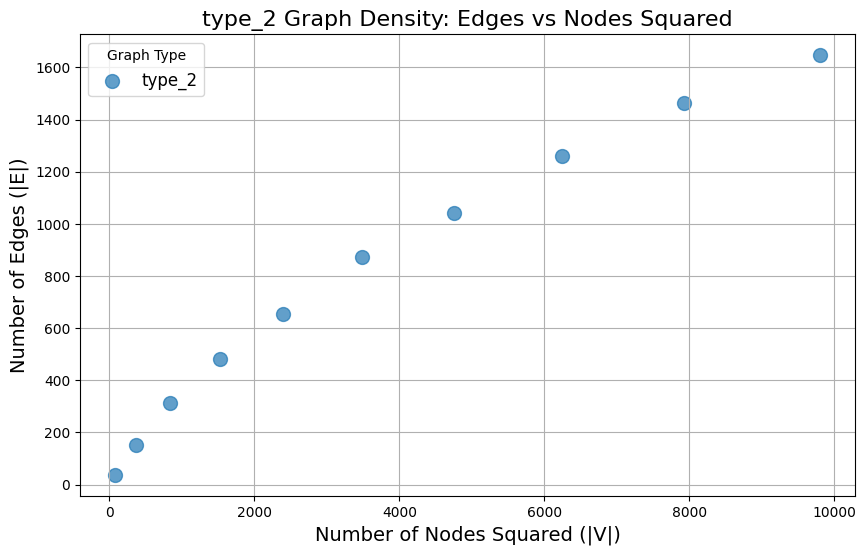

Density Summary for type_2:
     Type  avg_edges  avg_nodes  avg_edges_per_node Density Classification
0  Type 3      103.1       54.0            1.853249                 Sparse


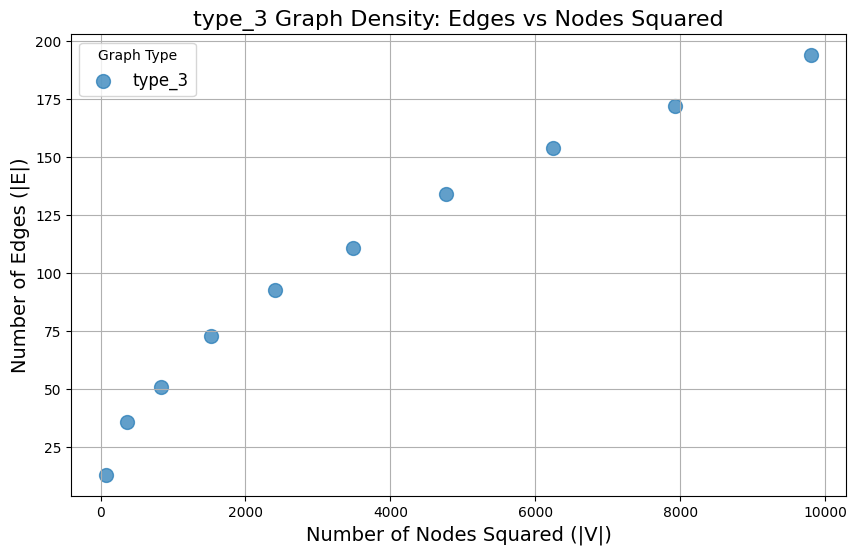

Density Summary for type_3:
     Type  avg_edges  avg_nodes  avg_edges_per_node Density Classification
0  Type 3      103.1       54.0            1.853249                 Sparse


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Define paths to the summary CSV files for each type
type_summary_files = {
    'type_1': '/content/drive/MyDrive/graphs/Deliverable 1/type_1_summary.csv',
    'type_2': '/content/drive/MyDrive/graphs/Deliverable 1/type_2_summary.csv',
    'type_3': '/content/drive/MyDrive/graphs/Deliverable 1/type_3_summary.csv'
}

# Step 2: Manually assign graph types based on file names
type_names = {
    'type_1': 'Type 1',
    'type_2': 'Type 2',
    'type_3': 'Type 3'
}

# Step 3: Iterate over each type and process the summary table
for graph_type, summary_file in type_summary_files.items():
    # Load the summary table for the current graph type
    table = pd.read_csv(summary_file)

    # Print column names to debug the issue
    #print(f"Columns in {graph_type}: {table.columns.tolist()}")

    # Strip any extra spaces in column names
    table.columns = table.columns.str.strip()

    # Step 4: Assign graph types to the table manually
    table['Type'] = type_names[graph_type]

    # Handle missing 'Number of Nodes' for type_1 by extracting from 'Matrix Shape' if possible
    if 'Number of Nodes' not in table.columns:
        if 'Matrix Shape' in table.columns:
            # Assuming Matrix Shape is a string like '(9, 9)', extract the number of nodes
            table['Number of Nodes'] = table['Matrix Shape'].apply(lambda x: int(x.strip('()').split(',')[0]) if isinstance(x, str) else None)

    # If 'Number of Nodes' is still missing, you need to handle this case
    if 'Number of Nodes' not in table.columns:
        print(f"Warning: 'Number of Nodes' column missing for {graph_type}. Skipping density calculations.")
        continue

    # Step 5: Calculate density metrics: edges per node, and number of nodes squared
    table['Edges per Node'] = table['Number of Edges'] / table['Number of Nodes']
    table['V^2'] = table['Number of Nodes'] ** 2

    # Step 6: Plot |E| vs |V|^2 for the current graph type to observe the relationship
    plt.figure(figsize=(10, 6))
    plt.scatter(table['V^2'], table['Number of Edges'], label=graph_type, s=100, alpha=0.7)
    plt.title(f'{graph_type} Graph Density: Edges vs Nodes Squared', fontsize=16)
    plt.xlabel('Number of Nodes Squared (|V|)', fontsize=14)
    plt.ylabel('Number of Edges (|E|)', fontsize=14)
    plt.legend(title='Graph Type', fontsize=12)
    plt.grid(True)
    plt.show()

    # Step 7: Density Classification based on new criteria
    def classify_density(row):
        V = row['Number of Nodes']
        E = row['Number of Edges']

        # Classifying based on new logic
        if E >= V**2 * 0.9:  # Dense: E ~ O(V^2)
            return 'Dense'
        elif E <= V:  # Sparse: E ~ O(V)
            return 'Sparse'
        elif E <= V * np.log(V):  # Moderate: E ~ O(V log V)
            return 'Moderate'
        else:
            return 'Unknown'

    # After reviewing the plot, assign each type as 'Sparse' or 'Dense' based on your observations.
    if graph_type == 'type_1':
        # Example classification based on visual inspection
        graph_density = 'Dense'
    elif graph_type == 'type_2':
        # Example classification based on visual inspection
        graph_density = 'Sparse'
    elif graph_type == 'type_3':
        # Example classification based on visual inspection
        graph_density = 'Sparse'

    # Add the density classification to the summary
    density_summary['Density Classification'] = graph_density

    # Step 8: Print the summary to inspect the results for the current type
    print(f"Density Summary for {graph_type}:")
    print(density_summary)

    # Step 9: Save the results for the current graph type to a CSV file
    density_summary.to_csv(f'/content/drive/MyDrive/graphs/Deliverable 2/{graph_type}_density_summary.csv', index=False)


DELIVERABLE 03

In [ ]:
import numpy as np
import pandas as pd
import heapq
from collections import defaultdict

# --- Union-Find Data Structure for Kruskal's Algorithm ---
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))  # Each node is initially its own parent
        self.rank = [0] * n  # Rank (height) of the trees

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])  # Path compression
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)

        if root_u != root_v:
            # Union by rank: attach smaller tree to the larger one
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1
            return True
        return False

# --- Prim's Algorithm (weight matrix + unordered array-based priority queue) ---
def prim_weight_matrix(graph_matrix):
    n = len(graph_matrix)
    in_mst = [False] * n  # Track nodes in the MST
    min_weight = [float('inf')] * n  # Initialize all weights to infinity
    parent = [-1] * n  # Parent array to reconstruct MST
    min_weight[0] = 0  # Start with node 0
    mst_weight = 0  # To track total weight of the MST

    for _ in range(n):
        # Find the node with the minimum weight that is not yet in the MST
        u = -1
        for v in range(n):
            if not in_mst[v] and (u == -1 or min_weight[v] < min_weight[u]):
                u = v

        # Include node u in MST
        in_mst[u] = True
        mst_weight += min_weight[u]

        # Update adjacent nodes' weights
        for v in range(n):
            if graph_matrix[u][v] != -1 and not in_mst[v]:  # If there's an edge
                if graph_matrix[u][v] < min_weight[v]:
                    min_weight[v] = graph_matrix[u][v]
                    parent[v] = u  # Update parent to u

    return mst_weight

# --- Kruskal's Algorithm (adjacency list + Union-Find) ---
def kruskal_adjacency_list(graph_adj_list, n):
    edges = set()  # Use set to avoid duplicate edges
    for u in range(n):
        for v, weight in graph_adj_list[u]:
            if u < v:  # Avoid duplicate edges in undirected graph
                edges.add((weight, u, v))  # Add edge as (weight, u, v)

    # Sort edges by weight
    edges = sorted(edges)

    uf = UnionFind(n)
    mst_weight = 0
    edges_used = 0

    for weight, u, v in edges:
        if uf.union(u, v):
            mst_weight += weight
            edges_used += 1
            if edges_used == n - 1:  # All edges for MST have been added
                break

    return mst_weight

# --- Prim's Algorithm using adjacency list with a heap-based priority queue ---
def prim_adjacency_list_heap(graph_adj_list, n):
    in_mst = [False] * n  # Track nodes in MST
    min_weight = [float('inf')] * n  # Initialize all weights to infinity
    parent = [-1] * n  # Parent array to reconstruct MST
    min_weight[0] = 0  # Start with node 0
    mst_weight = 0  # Total weight of the MST

    # Min-heap to store (weight, node) pairs
    pq = [(0, 0)]  # Start with node 0 having weight 0
    heapq.heapify(pq)

    while pq:
        weight, u = heapq.heappop(pq)

        if in_mst[u]:
            continue

        # Include node u in MST
        in_mst[u] = True
        mst_weight += weight

        # Update adjacent nodes' weights
        for v, edge_weight in graph_adj_list[u]:
            if not in_mst[v] and edge_weight < min_weight[v]:
                min_weight[v] = edge_weight
                parent[v] = u
                heapq.heappush(pq, (edge_weight, v))

    return mst_weight

# --- Generate MST Weights for Graphs ---
graphs = {}  # Dictionary to hold graph data

# Example graph generation (change this to load from a file or other source)
graph_matrix_1 = np.random.randint(1, 10, (5, 5))  # Random 5x5 matrix for demo
np.fill_diagonal(graph_matrix_1, -1)  # Set diagonal to -1 (no self-loops)
graphs['graph_1'] = graph_matrix_1

# Process each graph
mst_weights_prim = {}
mst_weights_kruskal = {}
mst_weights_prim_heap = {}

for graph_name, graph_data in graphs.items():
    if isinstance(graph_data, np.ndarray):  # Matrix format
        graph_adj_list = defaultdict(list)
        n = graph_data.shape[0]
        for i in range(n):
            for j in range(i + 1, n):  # Only consider upper triangle for undirected graph
                if graph_data[i, j] != -1:  # Ignore -1 (no edge)
                    graph_adj_list[i].append((j, graph_data[i, j]))
                    graph_adj_list[j].append((i, graph_data[i, j]))  # Undirected graph

        # Run the algorithms
        mst_weights_prim[graph_name] = prim_weight_matrix(graph_data)
        mst_weights_kruskal[graph_name] = kruskal_adjacency_list(graph_adj_list, n)
        mst_weights_prim_heap[graph_name] = prim_adjacency_list_heap(graph_adj_list, n)

# Generate results table
mst_results = pd.DataFrame({
    'Graph': list(mst_weights_prim.keys()),
    'Prim (Weight Matrix)': list(mst_weights_prim.values()),
    'Kruskal (Adj List)': list(mst_weights_kruskal.values()),
    'Prim (Adj List + Heap)': list(mst_weights_prim_heap.values())
})

# Print results
print(mst_results)


     Graph  Prim (Weight Matrix)  Kruskal (Adj List)  Prim (Adj List + Heap)
0  graph_1                    14                  14                      14


DELIEVRABLE 04

Checking directory: /content/drive/MyDrive/graphs/type_1
Files found for type_1: ['t1_graph_4.csv', 't1_graph_3.csv', 't1_graph_1.csv', 't1_graph_7.csv', 't1_graph_8.csv', 't1_graph_0.csv', 't1_graph_5.csv', 't1_graph_9.csv', 't1_graph_6.csv', 't1_graph_2.csv']
Checking directory: /content/drive/MyDrive/graphs/type_2
Files found for type_2: ['t2_graph_9.csv', 't2_graph_8.csv', 't2_graph_2.csv', 't2_graph_6.csv', 't2_graph_3.csv', 't2_graph_1.csv', 't2_graph_5.csv', 't2_graph_4.csv', 't2_graph_7.csv', 't2_graph_0.csv']
Checking directory: /content/drive/MyDrive/graphs/type_3
Files found for type_3: ['t3_graph_0.csv', 't3_graph_2.csv', 't3_graph_9.csv', 't3_graph_1.csv', 't3_graph_6.csv', 't3_graph_3.csv', 't3_graph_5.csv', 't3_graph_8.csv', 't3_graph_4.csv', 't3_graph_7.csv']


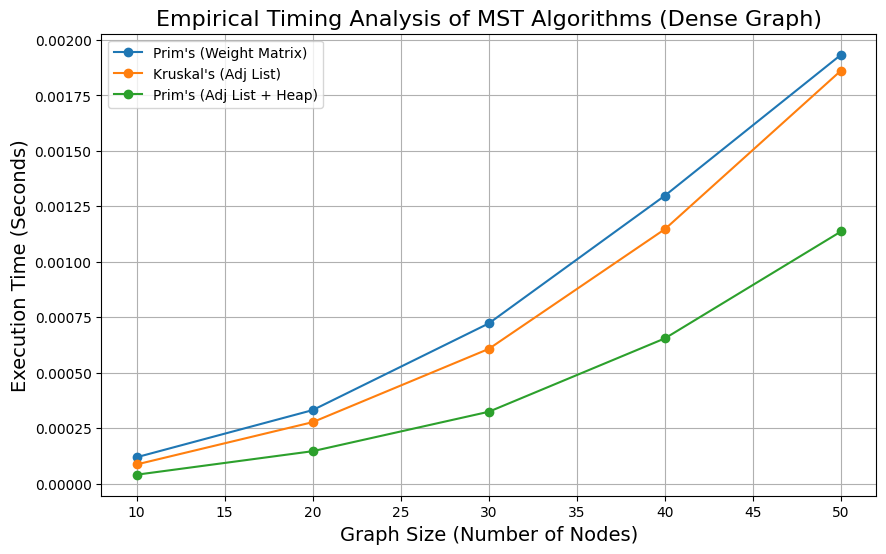

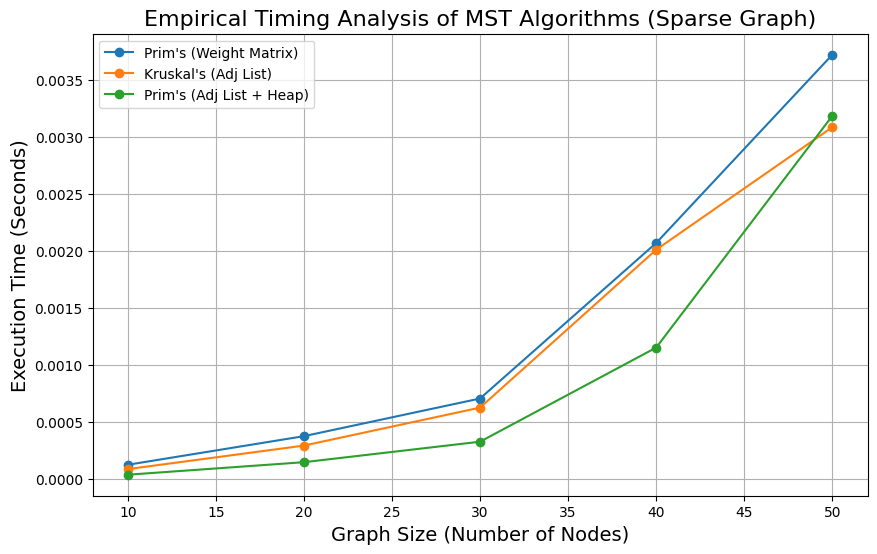

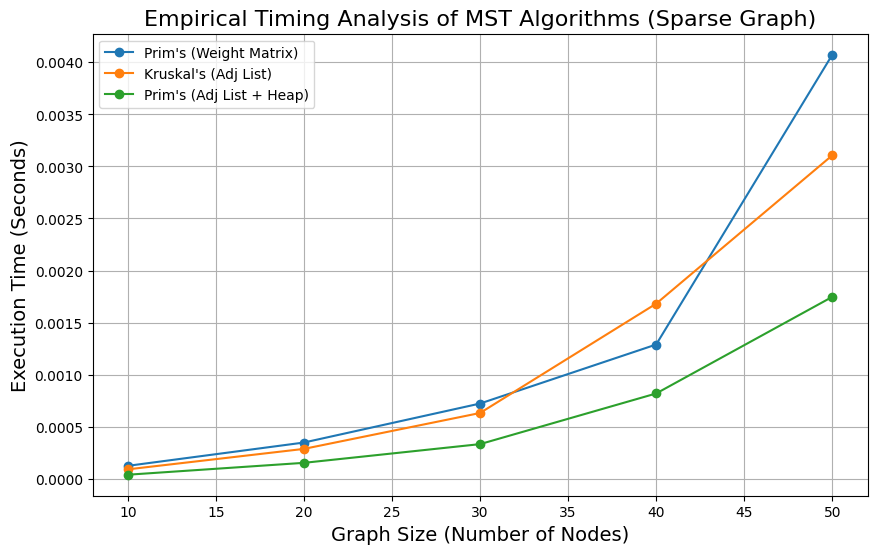

In [ ]:
import os
import pandas as pd
import networkx as nx
import time
import matplotlib.pyplot as plt
from collections import defaultdict
from heapq import heappush, heappop, heapify

# Step 1: Define paths to type_1, type_2, and type_3 folders
graph_dirs = ['/content/drive/MyDrive/graphs/type_1',
              '/content/drive/MyDrive/graphs/type_2',
              '/content/drive/MyDrive/graphs/type_3']
graphs_by_type = {'type_1': {}, 'type_2': {}, 'type_3': {}}

# Step 2: Load CSV files from the folders and store them by type
for graph_dir in graph_dirs:
    graph_type = os.path.basename(graph_dir)  # 'type_1', 'type_2', or 'type_3'
    graph_files = [f for f in os.listdir(graph_dir) if f.endswith('.csv')]

    print(f"Checking directory: {graph_dir}")
    if graph_files:
        print(f"Files found for {graph_type}: {graph_files}")
    else:
        print(f"No files found in {graph_dir}.")

    for file in graph_files:
        file_path = os.path.join(graph_dir, file)
        try:
            matrix = pd.read_csv(file_path, header=None).values
            graphs_by_type[graph_type][file] = matrix
        except Exception as e:
            print(f"Error loading {file}: {e}")

# Step 3: Function to create a graph and count nodes/edges
def load_graph(matrix):
    G = nx.Graph()
    rows, cols = matrix.shape
    for i in range(rows):
        for j in range(i + 1, cols):  # Only upper triangle for undirected graphs
            if matrix[i, j] != -1:  # Edge exists
                G.add_edge(i, j, weight=matrix[i, j])
    return G

# Step 4: Process each graph to compute nodes and edges for each type
graph_info_by_type = {'type_1': {}, 'type_2': {}, 'type_3': {}}

for graph_type, graphs in graphs_by_type.items():
    for name, matrix in graphs.items():
        G = load_graph(matrix)
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        graph_info_by_type[graph_type][name] = {'nodes': num_nodes, 'edges': num_edges}

# Step 5: Function to run Prim's and Kruskal's algorithms (we are reusing this from earlier code)
def prim_weight_matrix(graph_matrix):
    n = len(graph_matrix)
    in_mst = [False] * n
    min_edge = [float('inf')] * n  # Store the minimum edge weight for each node
    min_edge[0] = 0
    mst_weight = 0

    for _ in range(n):
        # Find the vertex with the minimum edge weight not yet included in MST
        u = -1
        for v in range(n):
            if not in_mst[v] and (u == -1 or min_edge[v] < min_edge[u]):
                u = v

        in_mst[u] = True
        mst_weight += min_edge[u]

        # Update the key value for adjacent vertices
        for v in range(n):
            if graph_matrix[u][v] != -1 and not in_mst[v]:
                min_edge[v] = min(min_edge[v], graph_matrix[u][v])

    return mst_weight

def kruskal_adjacency_list(graph_adj_list, n):
    # Generate list of edges with weights
    edges = []
    for u in graph_adj_list:
        for v, weight in graph_adj_list[u]:
            if u < v:  # To avoid double counting
                edges.append((weight, u, v))

    # Sort edges by weight
    edges.sort()

    uf = UnionFind(n)
    mst_weight = 0

    # Iterate through edges, applying union-find
    for weight, u, v in edges:
        if uf.find(u) != uf.find(v):
            uf.union(u, v)
            mst_weight += weight

    return mst_weight

def prim_adjacency_list_heap(graph_adj_list, n):
    in_mst = [False] * n
    min_edge = [(0, 0)]  # (weight, node)
    mst_weight = 0
    heapify(min_edge)  # Now heapify works after importing heapify

    while min_edge:
        weight, u = heappop(min_edge)

        if in_mst[u]:
            continue

        in_mst[u] = True
        mst_weight += weight

        for v, w in graph_adj_list[u]:
            if not in_mst[v]:
                heappush(min_edge, (w, v))

    return mst_weight

# Step 6: Timing Functions for MST Algorithms
def time_prim_weight_matrix(graph_matrix):
    start_time = time.time()
    mst_weight = prim_weight_matrix(graph_matrix)
    end_time = time.time()
    return end_time - start_time

def time_kruskal(graph_adj_list, n):
    start_time = time.time()
    mst_weight = kruskal_adjacency_list(graph_adj_list, n)
    end_time = time.time()
    return end_time - start_time

def time_prim_adjacency_list_heap(graph_adj_list, n):
    start_time = time.time()
    mst_weight = prim_adjacency_list_heap(graph_adj_list, n)
    end_time = time.time()
    return end_time - start_time

# Step 7: Prepare Data for Plotting
graph_types = ["Dense", "Sparse", "Sparse"]
sizes = [10, 20, 30, 40, 50]  # Graph sizes based on the files

for graph_type in graph_types:
    time_prim_matrix = []
    kruskal_times = []  # Renamed to avoid conflict with function name
    time_prim_heap = []

    # Create random graph matrices and adjacency lists of different sizes #
    for size in sizes:
        graph_matrix, graph_adj_list = generate_graph(graph_type, size)

        # Time the algorithms for the current graph size
        time_prim_matrix.append(time_prim_weight_matrix(graph_matrix))
        kruskal_times.append(time_kruskal(graph_adj_list, size))  # Now using kruskal_times
        time_prim_heap.append(time_prim_adjacency_list_heap(graph_adj_list, size))

    # Plot the results to visualize time complexity for each graph type
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, time_prim_matrix, label="Prim's (Weight Matrix)", marker='o')
    plt.plot(sizes, kruskal_times, label="Kruskal's (Adj List)", marker='o')
    plt.plot(sizes, time_prim_heap, label="Prim's (Adj List + Heap)", marker='o')

    plt.xlabel('Graph Size (Number of Nodes)', fontsize=14)
    plt.ylabel('Execution Time (Seconds)', fontsize=14)
    plt.title(f'Empirical Timing Analysis of MST Algorithms ({graph_type.capitalize()} Graph)', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

